In [60]:
import pandas as pd
import numpy as np
import quandl
import matplotlib.pyplot as plt
from scipy.optimize import minimize
%matplotlib inline

In [3]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [4]:
aapl = quandl.get('WIKI/AAPL.11', start_date=start, end_date=end)
cisco = quandl.get('WIKI/CSCO.11', start_date=start, end_date=end)
ibm = quandl.get('WIKI/IBM.11', start_date=start, end_date=end)
amzn = quandl.get('WIKI/AMZN.11', start_date=start, end_date=end)
aapl.head()

,Adj. Close
Date,
2012-01-03,52.848787
2012-01-04,53.132802
2012-01-05,53.722681
2012-01-06,54.284287
2012-01-09,54.198183


In [5]:
for stock_df in (aapl, cisco, ibm, amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close']

In [6]:
#Allocation
#30% Apple
#20% Cisco
#40% Amazon
#10% ibm

In [7]:
for stock_df, allo in zip((aapl, cisco, ibm, amzn), [.3, .2, .4, .1]):
    stock_df['Allocation'] = stock_df['Normed Return'] * allo
    
aapl.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660


In [8]:
for stock_df in (aapl, cisco, ibm, amzn):
    stock_df['Position Values'] = stock_df['Allocation'] * 1000000
    
aapl.head()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2012-01-03,52.848787,1.000000,0.300000,300000.000000
2012-01-04,53.132802,1.005374,0.301612,301612.236461
2012-01-05,53.722681,1.016536,0.304961,304960.727573
2012-01-06,54.284287,1.027162,0.308149,308148.724558
2012-01-09,54.198183,1.025533,0.307660,307659.946988


In [9]:
all_pos_values = [aapl['Position Values'], cisco['Position Values'], ibm['Position Values'], amzn['Position Values']]
portifolio_val = pd.concat(all_pos_values, axis=1)
portifolio_val.head()

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [10]:
portifolio_val.columns = ['AAPL Pos', 'CISCO Pos', 'IBM Pos', 'AMZN Pos']
portifolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [11]:
portifolio_val['Total Pos'] = portifolio_val.sum(axis=1)
portifolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


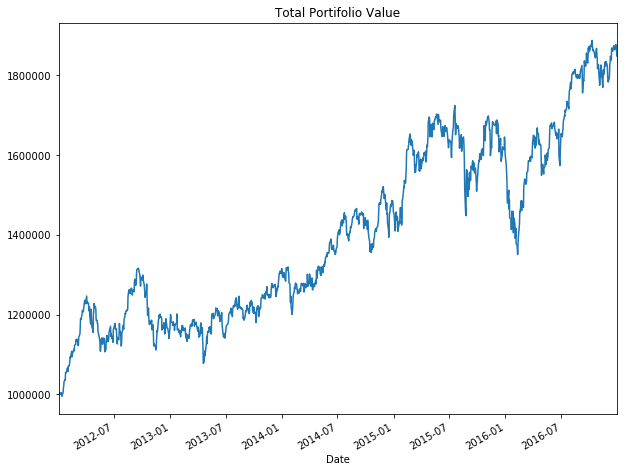

In [12]:
portifolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portifolio Value')

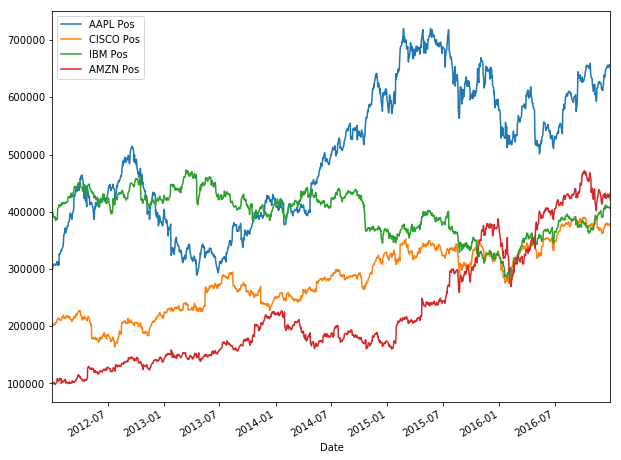

In [13]:
portifolio_val.drop('Total Pos', axis=1).plot(figsize=(10,8))

In [14]:
portifolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


In [15]:
portifolio_val['Daily Return'] = portifolio_val['Total Pos'].pct_change(1)

In [16]:
portifolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos,Daily Return
Date,,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06,NaN
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06,0.002996
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06,0.000761
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06,0.000675
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06,-0.003487


In [17]:
portifolio_val['Daily Return'].mean()

0.00054423307162152444

In [18]:
portifolio_val['Daily Return'].std()

0.010568287769161725

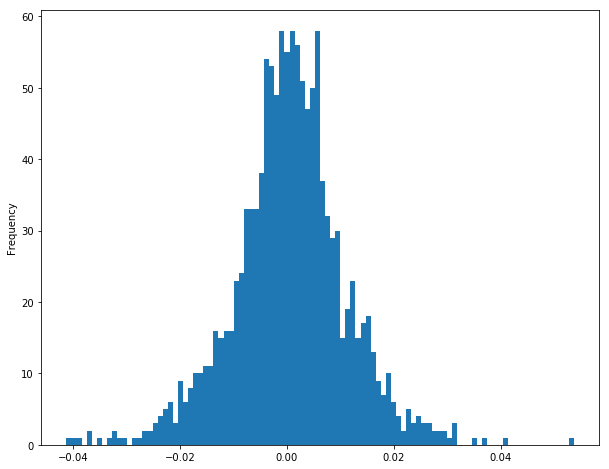

In [19]:
portifolio_val['Daily Return'].plot(kind='hist', bins=100, figsize=(10,8))

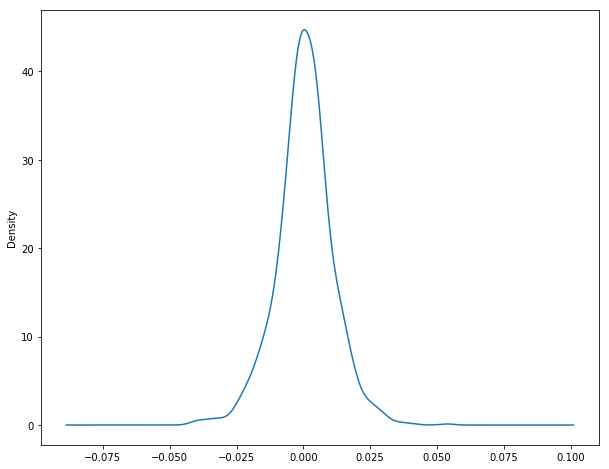

In [20]:
portifolio_val['Daily Return'].plot(kind='kde', figsize=(10,8))

In [21]:
cumulative_return = 100 * (portifolio_val['Total Pos'][-1] / portifolio_val['Total Pos'][0] - 1)
cumulative_return

84.742851816655445

In [22]:
#Sharpe Ratio
SR = portifolio_val['Daily Return'].mean() / portifolio_val['Daily Return'].std()
SR

0.051496806626480887

In [23]:
ASR = (252**0.5) * SR
ASR

0.81748646188590901

# Part Two

In [24]:
aapl = pd.read_csv('part-two/AAPL_CLOSE', index_col='Date', parse_dates=True)
cisco = pd.read_csv('part-two/CISCO_CLOSE', index_col='Date', parse_dates=True)
ibm = pd.read_csv('part-two/IBM_CLOSE', index_col='Date', parse_dates=True)
amzn = pd.read_csv('part-two/AMZN_CLOSE', index_col='Date', parse_dates=True)

In [25]:
stocks = pd.concat([aapl, cisco, ibm, amzn], axis=1)
stocks.columns = ['appl', 'cisco', 'ibm', 'amzn']
stocks.head()

,appl,cisco,ibm,amzn
Date,,,,
2012-01-03,53.063218,15.752778,160.830881,179.03
2012-01-04,53.348386,16.057180,160.174781,177.51
2012-01-05,53.940658,15.997991,159.415086,177.61
2012-01-06,54.504543,15.938801,157.584912,182.61
2012-01-09,54.418089,16.040268,156.764786,178.56


In [26]:
stocks.pct_change(1).mean()

appl     0.000750
cisco    0.000599
ibm      0.000081
amzn     0.001328
dtype: float64

In [27]:
stocks.pct_change(1).corr()

,appl,cisco,ibm,amzn
appl,1.000000,0.301990,0.297498,0.235487
cisco,0.301990,1.000000,0.424672,0.284470
ibm,0.297498,0.424672,1.000000,0.258492
amzn,0.235487,0.284470,0.258492,1.000000


In [28]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,appl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


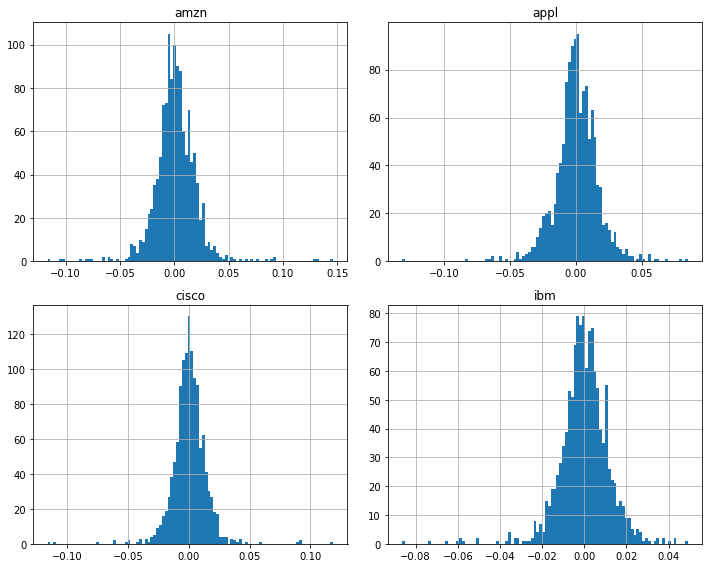

In [29]:
log_ret.hist(bins=100, figsize=(10,8))
plt.tight_layout()

In [30]:
log_ret.mean()

appl     0.000614
cisco    0.000497
ibm      0.000011
amzn     0.001139
dtype: float64

In [31]:
log_ret.cov() * 252

,appl,cisco,ibm,amzn
appl,0.068326,0.017854,0.014464,0.018986
cisco,0.017854,0.051381,0.018029,0.019956
ibm,0.014464,0.018029,0.035203,0.014939
amzn,0.018986,0.019956,0.014939,0.094470


In [35]:
np.random.seed(101)

'''print(stocks.columns)
weights = np.array(np.random.random(4))
print("Random Weights:")
print(weights)

print('Rebalance')
weights = weights / np.sum(weights)
print(weights)

print("Expected Portfolio Return")
exp_ret = np.sum((log_ret.mean() * weights) * 252)
print(exp_ret)

print("Expected Volatility")
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)

print("Sharpe Ratio")
SR = exp_ret / exp_vol
print(SR)'''

num_ports = 5000
all_weights = np.zeros((num_ports, len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):
    weights = np.array(np.random.random(4))
    weights = weights / np.sum(weights)
    
    all_weights[ind,:] = weights

    ret_arr[ind] = np.sum((log_ret.mean() * weights) * 252)
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    
    sharpe_arr[ind] = ret_arr[ind] / vol_arr[ind]


In [36]:
sharpe_arr.max()

1.0303260551271067

In [37]:
sharpe_arr.argmax()

1420

In [51]:
all_weights[1420,:]

max_sr_ret = ret_arr[1420]
max_sr_vol = vol_arr[1420]

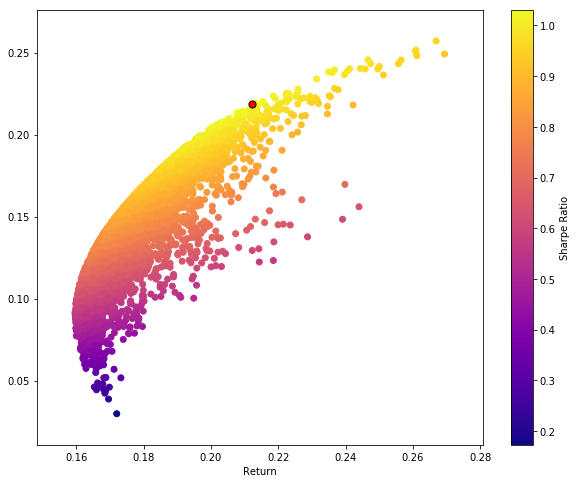

In [58]:
plt.figure(figsize=(10,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.xlabel('Return')

plt.scatter(max_sr_vol, max_sr_ret, c='red', s=50, edgecolors='black')

In [59]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret / vol
    return np.array([ret, vol, sr])

In [62]:
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * -1

In [63]:
def check_sum(weights):
    return np.sum(weights) - 1

In [65]:
cons = ({'type': 'eq', 'fun': check_sum})
bounds = ((0,1), (0,1), (0,1), (0,1))
init_guess = [0.25, 0.25,  0.25, 0.25]

opt_results = minimize(neg_sharpe, init_guess, method="SLSQP", bounds=bounds, constraints=cons)
opt_results

     fun: -1.0307168703347112
     jac: array([  5.64157963e-05,   4.18424606e-05,   3.39921728e-01,
        -4.45097685e-05])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([ 0.26628977,  0.20418983,  0.        ,  0.5295204 ])

In [66]:
get_ret_vol_sr(opt_results.x)

array([ 0.21885915,  0.21233683,  1.03071687])

In [76]:
frontier_y = np.linspace(0, 0.3, 100)

def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

frontier_volatility = []

for possible_return in frontier_y:
    cons = ({'type': 'eq', 'fun': check_sum},
            {'type': 'eq', 'fun': lambda w : get_ret_vol_sr(w)[0] - possible_return})
    
    reslt = minimize(minimize_volatility, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
    
    frontier_volatility.append(reslt['fun'])

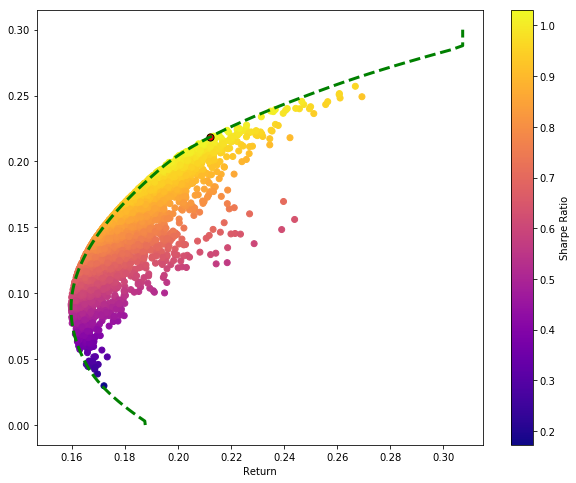

In [83]:
plt.figure(figsize=(10,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.xlabel('Return')

plt.scatter(max_sr_vol, max_sr_ret, c='red', s=50, edgecolors='black')
plt.plot(frontier_volatility, frontier_y, 'g--', linewidth=3)